# Visualization handbook

##### Here are some juicy plots we found during exploration. Since visualization requires repeated calling and tinkering of the plotting functions, we encapsulated the plotting function in `visualize_utils.py`. 


##### Check the docstings in the py file for extra details! ~



In [20]:
import visualize_utils as vu
import pandas as pd

THEMES = vu.THEMES

File link: [full_billboard_with_themes.csv](https://drive.google.com/file/d/19Jr_gr8dSwpZ1KwMkQHlmH4y-ygH-pu4/view?usp=sharing) 

In [4]:
full_data = pd.read_csv('full_billboard_with_themes.csv') # load this csv!
full_data.head()

,date,song,artist,rank,average_positive,average_negative,Adventure,Celebration,Community,Family,...,Individuality,Love,Nature,Nostalgia,Politics,Religion,Sexuality,Struggle,Violence,Wealth
0,2021-11-06,Easy On Me,Adele,1,0.0,0.00479,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021-10-30,Easy On Me,Adele,1,0.0,0.00479,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2021-10-23,Easy On Me,Adele,68,0.0,0.00479,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2021-11-14,Easy On Me,Adele,1,0.0,0.00479,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2021-11-21,Easy On Me,Adele,2,0.0,0.00479,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# sort by date then rank

full_data['date'] = pd.to_datetime(full_data['date'])
full_data = full_data.sort_values(by=['date', 'rank'])
full_data = full_data.reset_index(drop=True)

full_data.head()

,date,song,artist,rank,average_positive,average_negative,Adventure,Celebration,Community,Family,...,Individuality,Love,Nature,Nostalgia,Politics,Religion,Sexuality,Struggle,Violence,Wealth
0,1958-08-04,Poor Little Fool,Ricky Nelson,1,0.000000,0.015653,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1958-08-04,Splish Splash,Bobby Darin,3,0.000000,0.043491,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1958-08-04,When,Kalin Twins,5,0.999501,0.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1958-08-04,Yakety Yak,The Coasters,7,0.000000,0.002233,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1958-08-04,My True Love,Jack Scott,8,0.998784,0.000000,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Example usages:


#### Explore theme and sentimental score trends? (Time range, time interval is customizable)


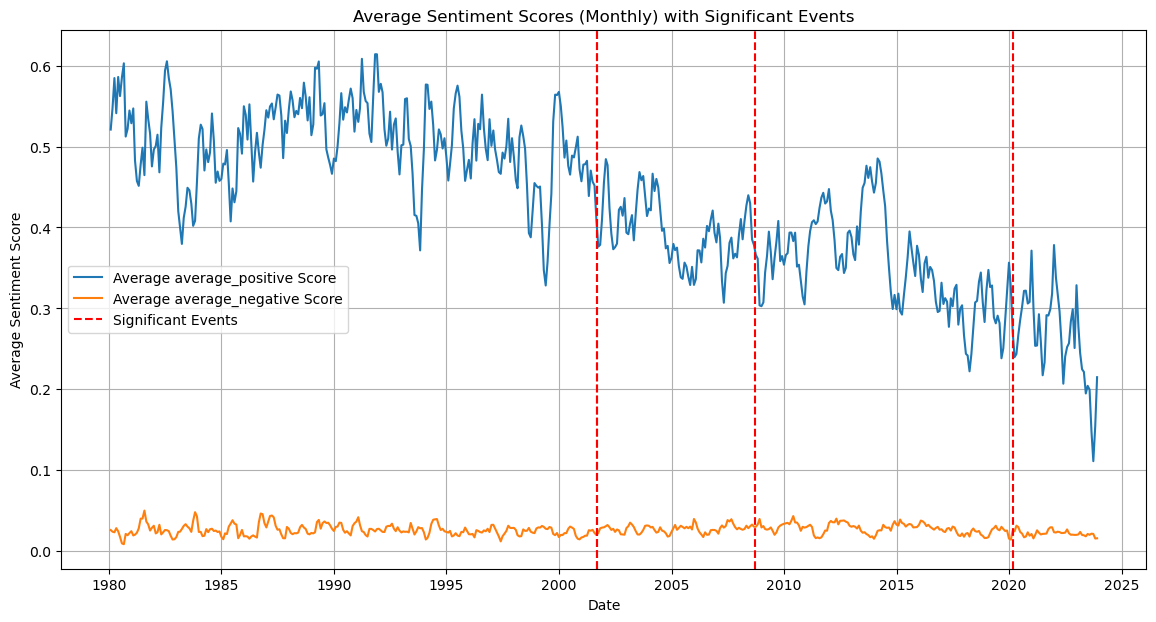

In [6]:
events = [
    ('2001-09-11', '9/11 Attacks'),
    ('2008-09-15', 'Financial Crisis'),
    ('2020-03-11', 'COVID-19 Declared Pandemic')
]
vu.plot_sentiment_scores_over_time(full_data, ['average_positive', 'average_negative'], 
                                '1980-01-01', '2023-12-01', "monthly",
                                 events=events)

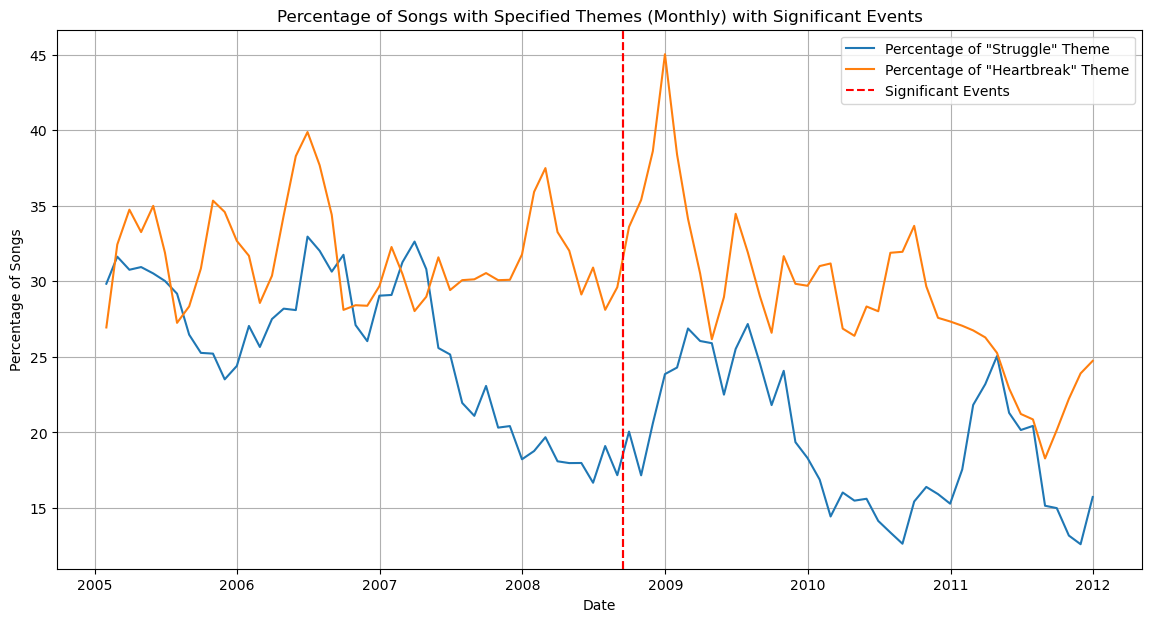

In [7]:
events = [
    ('2008-09-15', 'Financial Crisis - bankruptcy of Lehman Brothers'),
]
vu.plot_theme_percentage_over_time(full_data, 
                                   ['Struggle', 'Heartbreak'],
                                   '2005-01-01', '2012-01-01', 
                                   "monthly", events)

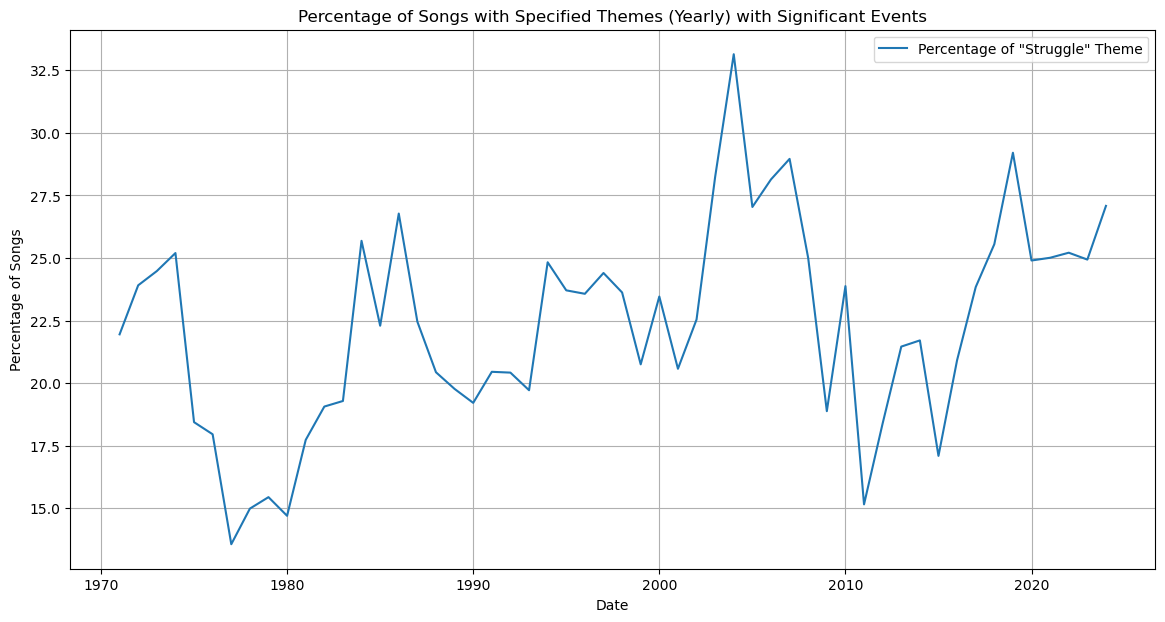

In [8]:
vu.plot_theme_percentage_over_time(full_data,['Struggle'], '1970-01-01', '2024-01-01', "yearly")

### Theme distribution


This is the labeling provided from one-shot response of gpt-3.5 give the full lyrics. One future direction: validate the themes with multiple model calls.

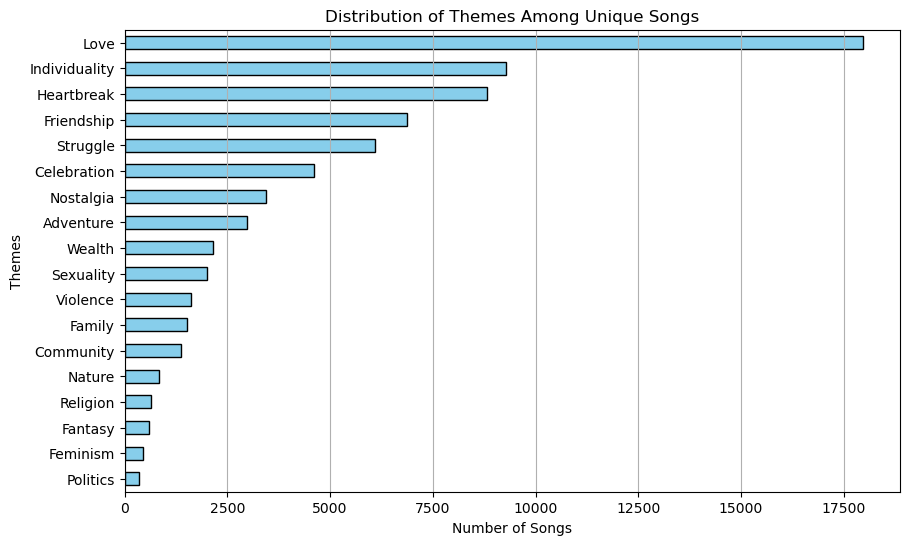

In [9]:
vu.plot_theme_distribution(full_data, THEMES,)

### longivity distribution

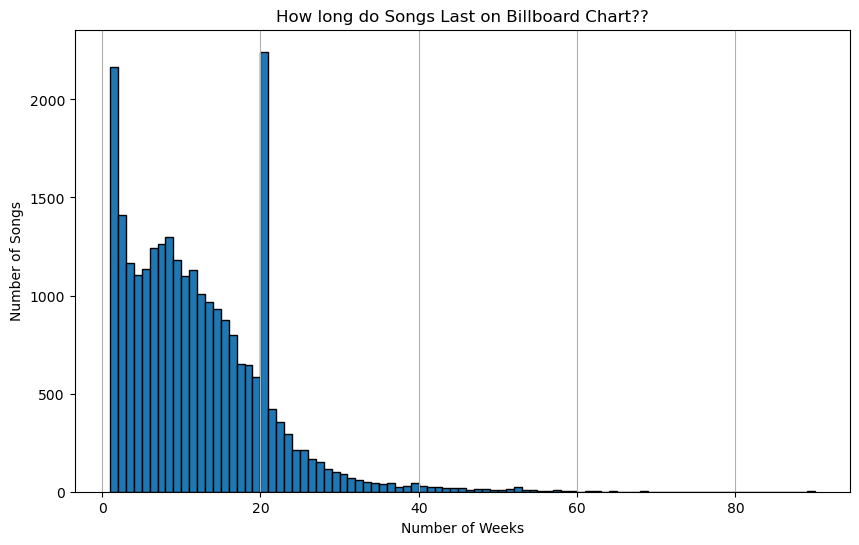

In [10]:
vu.plot_weeks_on_chart(full_data, title="How long do Songs Last on Billboard Chart??")

**Note** -- Week 20 has special meaning on US Billboard:
- Any music can last *at most* 20 weeks on chart unconditionally as long as the popularity is here
- However, after initial 20 weeks, if your performance on chart is below a threshold and decreasing, you well be removed immediately next week from the leaderboard chart.

Thus --- there is a spike in 20 weeks, and what last beyond that is the elites among the elites.


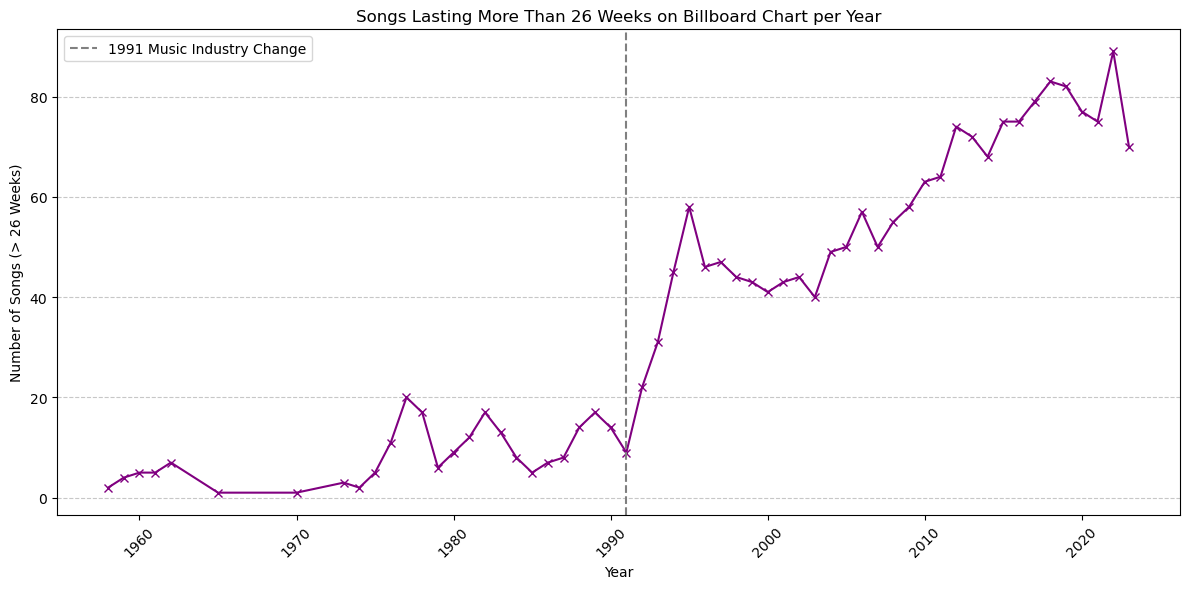

In [21]:
vu.plot_long_lasting_songs(full_data, 26) ## quickly see what songs lasted 26 weeks or more

### Example usage: Explore songs that last longer particularly (e.g. 21 weeks)

In [11]:
# a df with only songs that lasted >20 weeks (at least 21 weeks)
weeks_20_df = vu.filter_long_lasting_songs(full_data, 20)

In [12]:
weeks_20_df.groupby(['song','artist']).size().sort_values(ascending=False).head(10)

song                     artist                                   
Blinding Lights          The Weeknd                                   90
Heat Waves               Glass Animals                                90
Radioactive              Imagine Dragons                              87
Sail                     AWOLNATION                                   79
I'm Yours                Jason Mraz                                   76
How Do I Live            LeAnn Rimes                                  69
Party Rock Anthem        LMFAO Featuring Lauren Bennett & GoonRock    68
Counting Stars           OneRepublic                                  68
Something In The Orange  Zach Bryan                                   66
Rolling In The Deep      Adele                                        65
dtype: int64

In [13]:
# for example: search for "flowers" artists is Miley Cyrus
flowers =  full_data[(full_data['song'] == 'Flowers') & (full_data['artist'] == 'Miley Cyrus')]


In [14]:
# see what themes flowers has

flowers_themes = flowers[THEMES].sum()

flowers_themes # we see flowers are 45 weeks on board, with two themes: Heartbreak and individuality


Adventure         0
Celebration       0
Community         0
Family            0
Fantasy           0
Feminism          0
Friendship        0
Heartbreak       45
Individuality    45
Love              0
Nature            0
Nostalgia         0
Politics          0
Religion          0
Sexuality         0
Struggle          0
Violence          0
Wealth            0
dtype: int64

### Mean and median weeks on chart (yearly statistics)

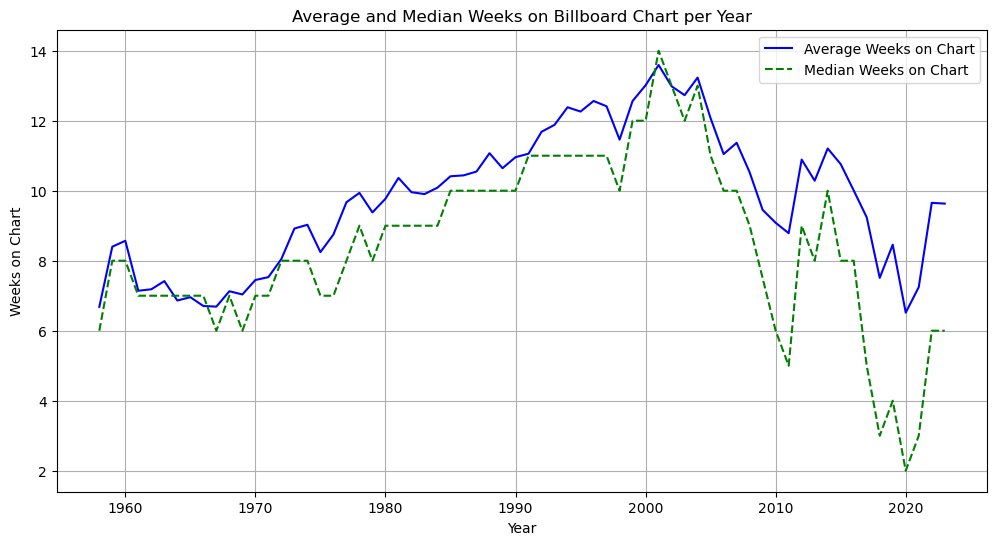

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

vu.plot_weeks_on_chart_stats(full_data)


### Other exploration used in presentation (not fully encapsulated)

In [ ]:
full_data = pd.read_csv('full_billboard_with_themes.csv')

In [ ]:
# Define your top N rank
top_n = 10

# Filter the DataFrame to include only the top N ranks
top_songs = full_data[full_data['rank'] <= top_n]

# Drop duplicates based on 'song', 'artist', and 'year' within the top N ranks
top_unique_songs = top_songs.drop_duplicates(subset=['song', 'artist', 'year'])

# drop year before 1961

top_unique_songs = top_unique_songs[top_unique_songs['year'] >= 1961]

# Count the number of unique top N songs per year
top_n_unique_songs_per_year = top_unique_songs.groupby('year').size()

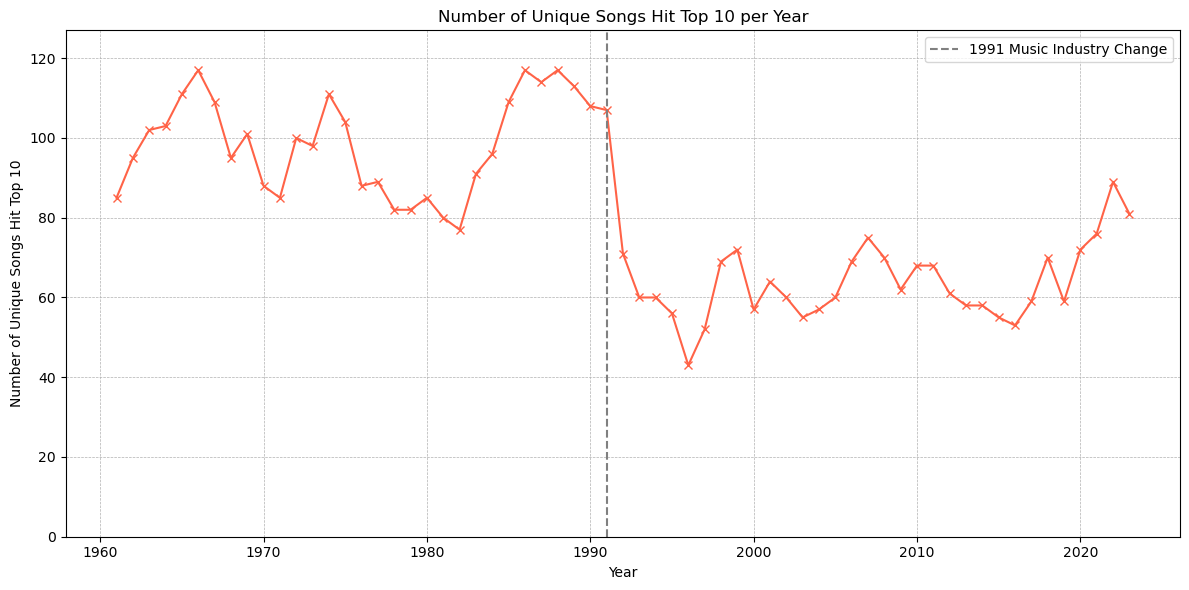

In [ ]:
plt.figure(figsize=(12, 6))
top_n_unique_songs_per_year.plot(kind='line', color='tomato', marker='x')
plt.title('Number of Unique Songs Hit Top 10 per Year')
plt.axvline(x=1991, color='grey', linestyle='--', label='1991 Music Industry Change')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs Hit Top 10')

# set y axis to start at 0

plt.ylim(0, top_n_unique_songs_per_year.max() + 10)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Define your top N rank
top_n = 50

# Filter the DataFrame to include only the top N ranks
top_songs = full_data[full_data['rank'] <= top_n]

# Drop duplicates based on 'song', 'artist', and 'year' within the top N ranks
top_unique_songs = top_songs.drop_duplicates(subset=['song', 'artist', 'year'])

# drop year before 1961

top_unique_songs = top_unique_songs[top_unique_songs['year'] >= 1961]

# Count the number of unique top N songs per year
top_n_unique_songs_per_year = top_unique_songs.groupby('year').size()

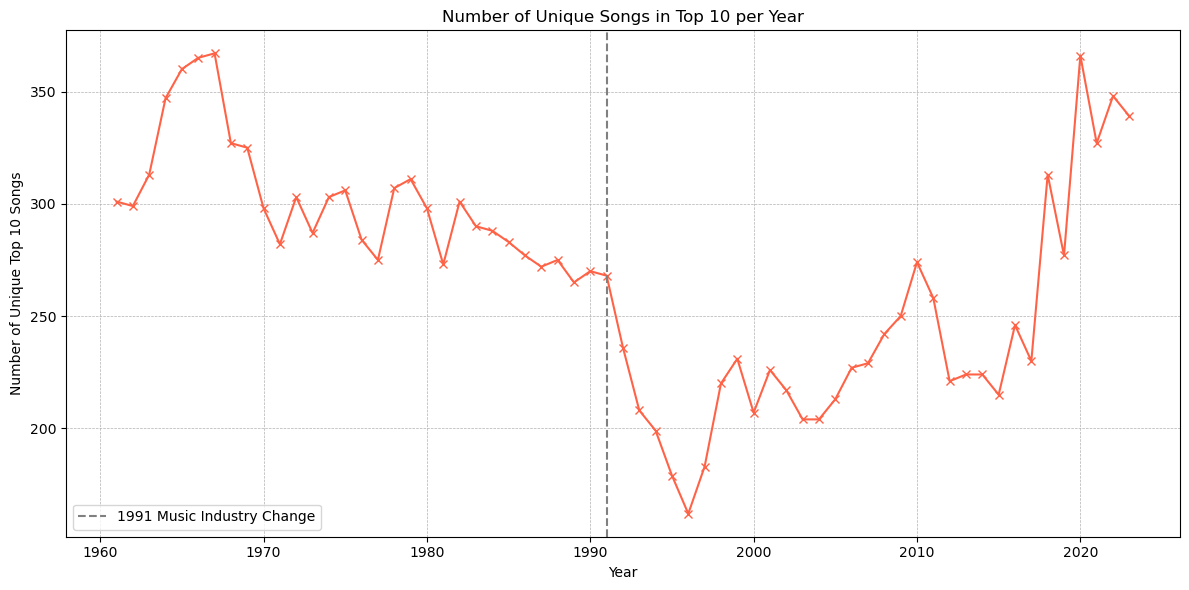

In [ ]:
plt.figure(figsize=(12, 6))
top_n_unique_songs_per_year.plot(kind='line', color='tomato', marker='x')
plt.title('Number of Unique Songs in Top 10 per Year')
plt.axvline(x=1991, color='grey', linestyle='--', label='1991 Music Industry Change')
plt.xlabel('Year')
plt.ylabel('Number of Unique Top 10 Songs')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

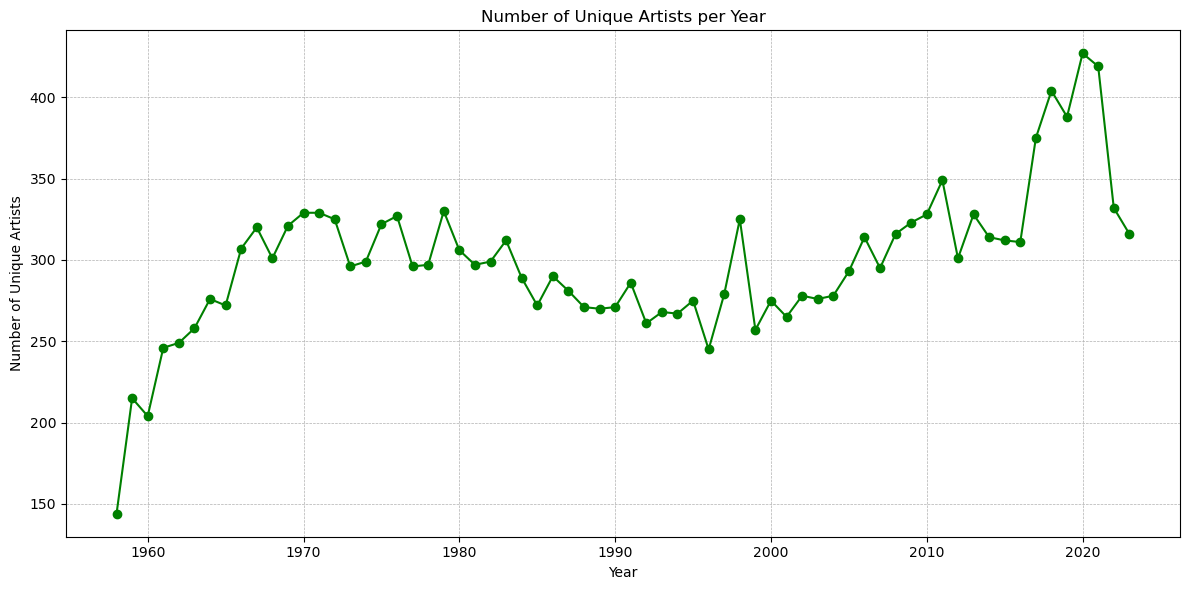

In [ ]:
# Drop duplicates based on 'artist' and 'year' to count each unique artist once per year
unique_artists = full_data.drop_duplicates(subset=['artist', 'year'])

# Count the number of unique artists per year
unique_artists_per_year = unique_artists.groupby('year').size()

# Plotting
plt.figure(figsize=(12, 6))
unique_artists_per_year.plot(kind='line', color='green', marker='o')
plt.title('Number of Unique Artists per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Artists')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

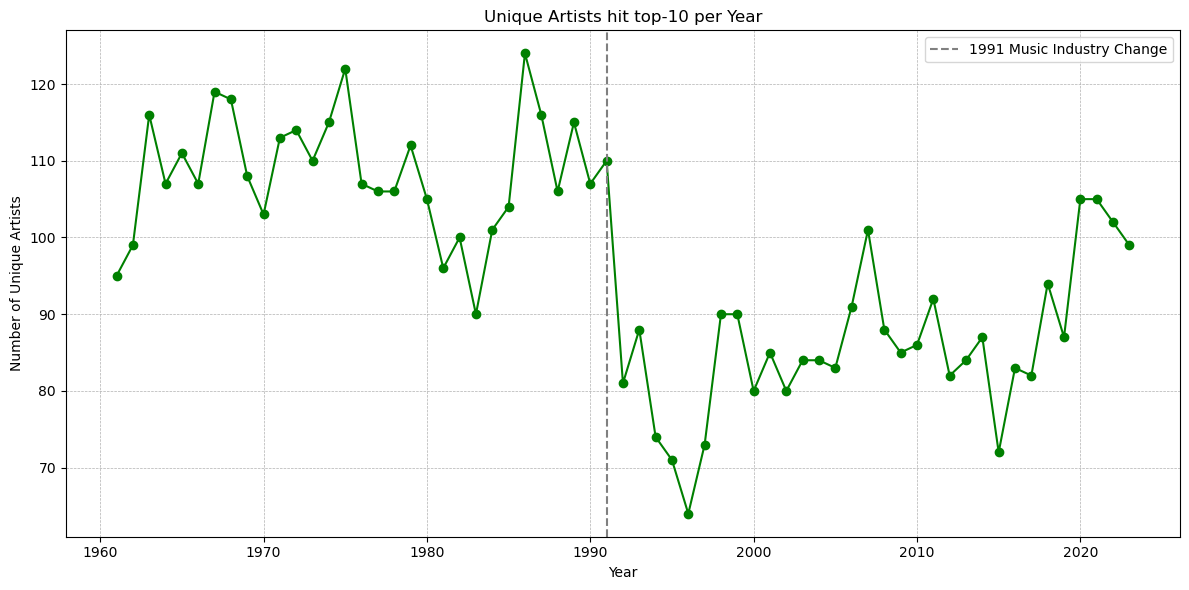

In [ ]:
top_n = 20

top_songs = full_data[full_data['rank'] <= top_n]

top_songs = top_songs[top_songs['year'] >= 1961]

unique_artists = top_songs.drop_duplicates(subset=['artist', 'year'])

# Count the number of unique artists per year
unique_artists_per_year = unique_artists.groupby('year').size()

# Plotting
plt.figure(figsize=(12, 6))
unique_artists_per_year.plot(kind='line', color='green', marker='o')
plt.title('Unique Artists hit top-10 per Year')
plt.axvline(x=1991, color='grey', linestyle='--', label='1991 Music Industry Change')
plt.xlabel('Year')
plt.ylabel('Number of Unique Artists')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()